# Load Saved Models

In [186]:
import os
import keras

filepath = os.path.join(os.getcwd(), 'cnn_models', 'keras_cifar10_model_augmented.keras')
model_01=keras.saving.load_model(filepath, custom_objects=None, compile=True, safe_mode=True)

In [187]:
model_01

<Sequential name=sequential, built=True>

## Inference

In [209]:
import requests

data_path = os.path.join(os.getcwd(), 'cnn_models', 'data')

custom_img_path = os.path.join(data_path, '<image_name>')


if not os.path.exists(custom_img_path):
    with open(custom_img_path, "wb") as f:
        request = requests.get("<image_url>")
        print(f"Downloading {custom_img_path}..")
        f.write(request.content)
else:
    print("Already exists")


Already exists


In [210]:

cust_img = keras.utils.load_img(
    custom_img_path,
    color_mode="rgb",
    target_size=None,
    interpolation="nearest",
    keep_aspect_ratio=False,
)

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import tensorflow as tf
from tensorflow import keras

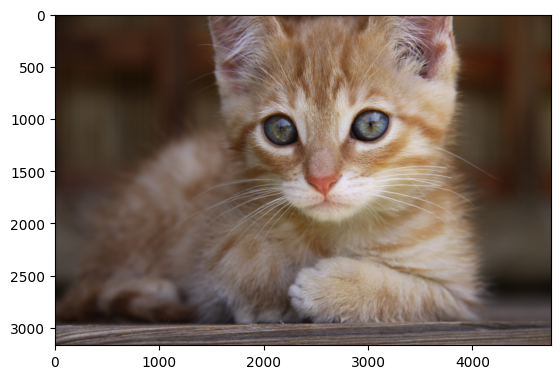

In [212]:
plt.imshow(cust_img)

### Resize Custom Image to fit shape

In [213]:
cust_img = tf.image.resize(cust_img, (32, 32))

In [214]:

img_array = keras.utils.img_to_array(cust_img)
img_array = keras.ops.expand_dims(img_array,axis= 0)  # Create batch axis

predictions = model_01.predict(img_array)


print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [215]:
pred_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for val in predictions:
    for i, pred in enumerate(val):
        if pred == 1:
            print(pred_labels[i])
        else:
            pass

ship
